In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd # Loading of Dataset i.e already Contain Cleaned text after removing Stop words,html,punctuation,Stemming
final1= pd.read_csv('clenanedreview.csv',sep=',',encoding='utf-8')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import accuracy_score


In [5]:
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


In [6]:
final2=final1.sort_values('Time', ascending=True)

In [7]:
def partition(x):
    if x == 'positive':
        return '1'
    return '-1'
actualScore = final2['Score']
positiveNegative = actualScore.map(partition) 
final2['Score'] = positiveNegative

In [8]:
y=final2['Score']

# TF-IDF with L2 Regularisation

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final2['CleanedText'].values, y, test_size=0.3, random_state=42)



In [11]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(X_train)
type(final_tf_idf)

scipy.sparse.csr.csr_matrix

In [12]:
final_tf_idf.shape

(254919, 60049)

In [13]:
final_tf_idf1 = tf_idf_vect.transform(X_test)

In [15]:
final_tf_idf1.shape

(109252, 60049)

In [16]:
from sklearn.preprocessing import StandardScaler
Standard_data=StandardScaler(with_mean=False).fit_transform(final_tf_idf)
Standard_data.shape
X_train=Standard_data

In [17]:
X_train.shape

(254919, 60049)

In [27]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
tuned_parameters = [{'C': [10**-1, 0.5*10**-1,10**0,5,10**1,15]}]


In [29]:
X_test=final_tf_idf1

In [30]:
X_test.shape

(109252, 60049)

In [31]:
from sklearn.preprocessing import StandardScaler
Standard_data=StandardScaler(with_mean=False).fit_transform(X_test)
X_test=Standard_data

In [32]:
model = GridSearchCV(LogisticRegression(n_jobs=2), tuned_parameters, scoring = 'f1_micro', cv=5)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.906097828873


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
labels=['1','-1']
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the logistic regression classifier for  lambda = %d is %f%%' % (1/0.1, acc))

[[87826  4178]
 [ 6081 11167]]

The accuracy of the logistic regression classifier for  lambda = 10 is 90.609783%


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
rand_list = {"C": stats.uniform(2, 10)}
l=stats.uniform(10**-4, 10**4)
model=RandomizedSearchCV(LogisticRegression(), param_distributions=rand_list, scoring = 'f1_micro', cv=5)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=3.3181857139794753, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.927598579431


In [28]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
labels=['1','-1']
confusion_matrix(y_test, y_pred,labels)


array([[89624,  2525],
       [ 5385, 11718]])

# Sparcity of TF-IDF

In [22]:
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
for i in range(len(C)):
    i=C[i]
    clf = LogisticRegression(C=i, penalty='l1');
    clf.fit(X_train, y_train);
    w = clf.coef_
    print("The no of Zeroes in w* for lambda={0} is {1}".format((1/i),71639-np.count_nonzero(w)))
    

The no of Zeroes in w* for lambda=10000.0 is 71639
The no of Zeroes in w* for lambda=100.0 is 71572
The no of Zeroes in w* for lambda=1.0 is 68664
The no of Zeroes in w* for lambda=0.01 is 41797
The no of Zeroes in w* for lambda=0.0001 is 28205


# TF-IDF L1 REGULARISATION

In [29]:
model = GridSearchCV(LogisticRegression(penalty='l1',n_jobs=2), tuned_parameters, scoring = 'f1_micro', cv=5)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=2,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.927058543551


In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
labels=['1','-1']
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the logistic regression classifier for  lambda = %d is %f%%' % (1, acc))

[[89658  2491]
 [ 5478 11625]]

The accuracy of the logistic regression classifier for  lambda = 1 is 92.705854%


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
rand_list = {"C": stats.uniform(2, 10)}
l=stats.uniform(10**-4, 10**4)
model=RandomizedSearchCV(LogisticRegression(penalty='l1',n_jobs=10), param_distributions=rand_list, scoring = 'f1_micro', cv=5)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=3.0844960491435272, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=10, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.925914399736


In [16]:
labels=['1','-1']
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the logistic regression classifier for  lambda = %d is %f%%' % (1/3.0844960491435272, acc))

[[89339  2780]
 [ 5314 11819]]

The accuracy of the logistic regression classifier for  lambda = 0 is 92.591440%


# BOW with L2 Regularisation

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final2['CleanedText'].values, y, test_size=0.3, random_state=42)

In [14]:
count_vect = CountVectorizer() #in scikit-learn
final_counts = count_vect.fit_transform(X_train)
final_counts.shape

(254919, 60049)

In [15]:
final_counts1= count_vect.transform(X_test)
final_counts1.shape

(109252, 60049)

In [16]:
from sklearn.preprocessing import StandardScaler
Standard_data=StandardScaler(with_mean=False).fit_transform(final_counts)
Standard_data.shape
X_train=Standard_data

In [17]:
from sklearn.preprocessing import StandardScaler
Standard_data=StandardScaler(with_mean=False).fit_transform(final_counts1)
Standard_data.shape
X_test=Standard_data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
tuned_parameters = [{'C': [10**-2, 10**0, 10**2]}]


In [45]:
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1_micro', cv=5)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.909209900048


In [46]:
labels=['1','-1']
y_pred=model.predict(X_test)

In [51]:
labels=['1','-1']
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the logistic regression classifier for  lambda = %d is %f%%' % (1/0.01, acc))

[[87893  4111]
 [ 5808 11440]]

The accuracy of the logistic regression classifier for  lambda = 100 is 90.920990%


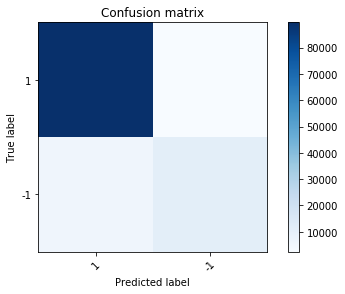

In [26]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=["1", "-1"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred,labels)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    



In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
rand_list = {"C": stats.uniform(0.01, 10)}
model=RandomizedSearchCV(LogisticRegression(penalty='l2',n_jobs=10), param_distributions=rand_list, scoring = 'f1_micro', cv=5)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=3.8144926467639824, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=10, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.926600886025


In [31]:
y_pred=model.predict(X_test)
labels=['1','-1']
print(confusion_matrix(y_test, y_pred,labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the logistic regression classifier for  lambda = %f is %f%%' % (1/3.8144926467639824, acc))

[[89519  2600]
 [ 5419 11714]]

The accuracy of the logistic regression classifier for  lambda = 0.262158 is 92.660089%


# BOW with L1 Regularisation

In [18]:
model = GridSearchCV(LogisticRegression(penalty='l1',n_jobs=10), tuned_parameters, scoring = 'f1_micro', cv=5)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=10,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.921044923663


In [19]:
labels=['1','-1']
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the logistic regression classifier for  lambda = %d is %f%%' % (1/0.01, acc))

[[89562  2442]
 [ 6184 11064]]

The accuracy of the logistic regression classifier for  lambda = 100 is 92.104492%


In [28]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=["1", "-1"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

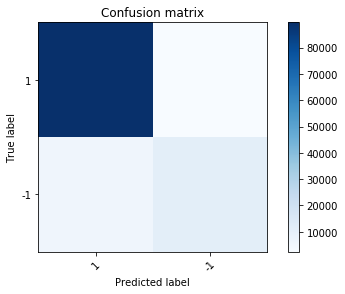

In [21]:
cm = confusion_matrix(y_test, y_pred,labels)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)   

In [35]:
y_pred=model.predict(X_train)
acc = accuracy_score(y_train, y_pred) * 100
error=100-acc
print("Training Error for BOW with L1 regularisation is",error)

Training Error for BOW with L1 regularisation is 5.41034603148


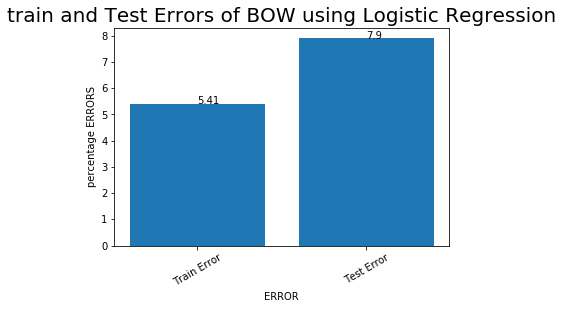

In [14]:
label=['Train Error','Test Error']
acc=[5.41,7.90]
index = np.arange(len(label))
barWidth=0.5

plt.bar(index, acc)
plt.xlabel('ERROR', fontsize=10)
plt.ylabel('percentage ERRORS', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
for i in range(len(label)):
    plt.text(x=i,y=acc[i],s=acc[i],size=10)
plt.title('train and Test Errors of BOW using Logistic Regression').set_fontsize(20)
plt.show()
    

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
rand_list = {"C": stats.uniform(0.01, 10)}
model=RandomizedSearchCV(LogisticRegression(penalty='l1',n_jobs=10), param_distributions=rand_list, scoring = 'f1_micro', cv=5)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=2.15630895223069, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=10, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.926353750961


In [25]:
labels=['1','-1']
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the logistic regression classifier for  lambda = %f is %f%%' % (1/2.8970491346317351, acc))

[[89433  2686]
 [ 5360 11773]]

The accuracy of the logistic regression classifier for  lambda = 0.345179 is 92.635375%


# Sparsity for BOW

In [26]:
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
for i in range(len(C)):
    i=C[i]
    clf = LogisticRegression(C=i, penalty='l1');
    clf.fit(X_train, y_train);
    w = clf.coef_
    print("The no of Zeroes in w* for lambda={0} is {1}".format((1/i),71639-np.count_nonzero(w)))
    

The no of Zeroes in w* for lambda=10000.0 is 71639
The no of Zeroes in w* for lambda=100.0 is 71572
The no of Zeroes in w* for lambda=1.0 is 68595
The no of Zeroes in w* for lambda=0.01 is 41741
The no of Zeroes in w* for lambda=0.0001 is 28065


# W2v with L2 regularisation

In [9]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

In [10]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
#print(stop)
print('************************************')
print(sno.stem('tasty'))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
************************************
tasti


In [11]:
i=0
list_of_sent=[]
for sent in final2['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(sno.stem(cleaned_words.lower()))
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [12]:
len(list_of_sent)

364171

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(list_of_sent, y, test_size=0.3, random_state=42)


In [14]:

w2v_model=gensim.models.Word2Vec(X_train,min_count=5,size=300, workers=4) 

In [15]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in X_train: # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

254919
300


In [16]:
import numpy as np
myarray = np.asarray(sent_vectors)
X_train=myarray

In [17]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in X_test: # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

109252
300


In [18]:
import numpy as np
myarray1= np.asarray(sent_vectors)
X_test=myarray1

In [19]:
from sklearn.preprocessing import Imputer
impute=Imputer(strategy='mean')
impute.fit(X_train)
w2v=impute.transform(X_train)
type(w2v)
w2v=pd.DataFrame(w2v)

In [20]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaler.fit(w2v)
sample_data=Scaler.transform(w2v)
X_test_data=Scaler.transform(X_test)

In [21]:
sample_data.shape

(254919, 300)

In [22]:
X_test_data.shape

(109252, 300)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
tuned_parameters = [{'C': [10**-3,10**-2]}]


In [23]:
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1_micro', cv=3)
model.fit(sample_data, y_train)
print(model.best_estimator_)
print(model.score(X_test_data, y_test))

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9113883498700254


In [25]:
labels=['1','-1']
y_pred=model.predict(X_test_data)
print(confusion_matrix(y_test, y_pred,labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the logistic regression classifier for  lambda = %f is %f%%' % (1/100, acc))

[[89201  2803]
 [ 6878 10370]]

The accuracy of the logistic regression classifier for  lambda = 0.010000 is 91.138835%


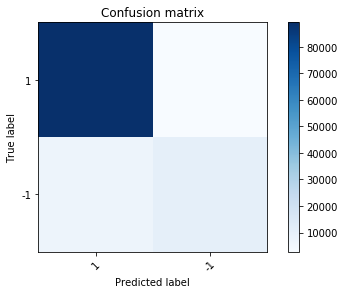

In [27]:
cm = confusion_matrix(y_test, y_pred,labels)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)   

In [28]:
y_pred=model.predict(sample_data)
acc = accuracy_score(y_train, y_pred) * 100
error=100-acc
print("Training Error for BOW with L1 regularisation is",error)

Training Error for BOW with L1 regularisation is 8.594887003322626


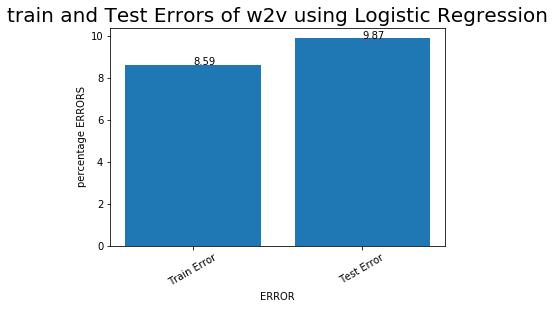

In [29]:
label=['Train Error','Test Error']
acc=[8.59,9.87]
index = np.arange(len(label))
barWidth=0.5

plt.bar(index, acc)
plt.xlabel('ERROR', fontsize=10)
plt.ylabel('percentage ERRORS', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
for i in range(len(label)):
    plt.text(x=i,y=acc[i],s=acc[i],size=10)
plt.title('train and Test Errors of w2v using Logistic Regression').set_fontsize(20)
plt.show()

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
rand_list = {"C": stats.uniform(10,100)}
model=RandomizedSearchCV(LogisticRegression(), param_distributions=rand_list, scoring = 'f1_micro', cv=5)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=21.14499981623247, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.914207520228


In [38]:
labels=['1','-1']
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred, labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the logistic regression classifier for  lambda = %f is %f%%' % ((1/21.14499981623247), acc))

[[89315  2764]
 [ 6609 10564]]

The accuracy of the logistic regression classifier for  lambda = 0.047293 is 91.420752%


In [44]:
C=[10**-4, 10**-2, 10**0, 10**2, 10**4]
for i in range(len(C)):
    i=C[i]
    clf = LogisticRegression(C=i, penalty='l1');
    clf.fit(X_train, y_train);
    w = clf.coef_
    print("The no of Zeroes in w* for lambda={0} is {1}".format((1/i),71639-np.count_nonzero(w)))

The no of Zeroes in w* for lambda=10000.0 is 71630
The no of Zeroes in w* for lambda=100.0 is 71591
The no of Zeroes in w* for lambda=1.0 is 71589
The no of Zeroes in w* for lambda=0.01 is 71589
The no of Zeroes in w* for lambda=0.0001 is 71589


# w2v with L1 Regularisation

In [25]:
tuned_parameters=[{'C': [10**-1,10]}]

In [26]:
model = GridSearchCV(LogisticRegression(penalty='l1'), tuned_parameters, scoring = 'f1_micro', cv=3)
model.fit(sample_data, y_train)
print(model.best_estimator_)
print(model.score(X_test_data, y_test))

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9115073408267126


In [27]:
labels=['1','-1']
y_pred=model.predict(X_test_data)
print(confusion_matrix(y_test, y_pred, labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the logistic regression classifier for  lambda = %f is %f%%' % ((1/10), acc))

[[89149  2855]
 [ 6813 10435]]

The accuracy of the logistic regression classifier for  lambda = 0.100000 is 91.150734%


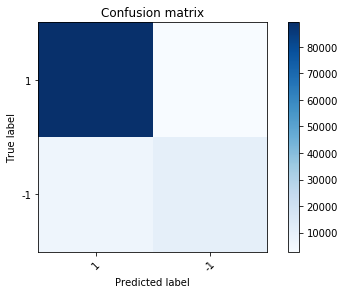

In [29]:
cm = confusion_matrix(y_test, y_pred,labels)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)  

In [30]:
y_pred=model.predict(sample_data)
acc = accuracy_score(y_train, y_pred) * 100
error=100-acc
print("Training Error for BOW with L1 regularisation is",error)

Training Error for BOW with L1 regularisation is 8.598809818020626


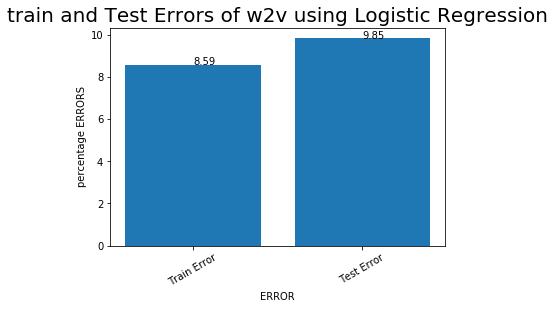

In [31]:
label=['Train Error','Test Error']
acc=[8.59,9.85]
index = np.arange(len(label))
barWidth=0.5

plt.bar(index, acc)
plt.xlabel('ERROR', fontsize=10)
plt.ylabel('percentage ERRORS', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
for i in range(len(label)):
    plt.text(x=i,y=acc[i],s=acc[i],size=10)
plt.title('train and Test Errors of w2v using Logistic Regression').set_fontsize(20)

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
rand_list = {"C": stats.uniform(20,22)}
model=RandomizedSearchCV(LogisticRegression(penalty='l1',n_jobs=4), param_distributions=rand_list, scoring = 'f1_micro', cv=3)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test)) 

LogisticRegression(C=22.730179705066419, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=4, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.913932925713


In [45]:
model=LogisticRegression(penalty='l1',C=22.730179705066419)
model.fit(X_train,y_train)

LogisticRegression(C=22.73017970506642, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [46]:
labels=['1','-1']
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred, labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the logistic regression classifier for  lambda = %f is %f%%' % ((1/22.730179705066419), acc))

[[89521  2803]
 [ 6367 10561]]

The accuracy of the logistic regression classifier for  lambda = 0.043994 is 91.606561%


# Tf-IDF-W2V with L2 Regularisation

In [17]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(final2['CleanedText'].values)
type(final_tf_idf)

scipy.sparse.csr.csr_matrix

In [18]:
tfidf_feat = tf_idf_vect.get_feature_names()
tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = final_tf_idf[row,tfidf_feat.index(word)]
            sent_vec += (vec * tfidf)
            weight_sum += tfidf
        except:
            pass
    #print(weight_sum)
    sent_vec /= (weight_sum)
    tfidf_sent_vectors.append(sent_vec)
    row += 1
print(row)

364171


In [19]:
myarray=np.asarray(tfidf_sent_vectors)
myarray.shape

(364171, 50)

In [20]:

df=pd.DataFrame(myarray)
df.shape

(364171, 50)

In [10]:
myarray= pd.read_csv('Book123.csv',sep='\t',encoding='utf-8',header=0,index_col=False)

In [11]:
myarray.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0,-1.002751,-1.856489,1.558805,-1.046987,-0.252264,0.764208,0.408269,1.255589,-0.887479,...,1.322412,0.149808,0.162798,-1.122607,0.023139,1.982921,-0.285209,-0.207310,0.302313,-0.850332
1,1,-1.803089,-2.240502,1.937356,0.860750,0.254682,1.509309,-0.089127,0.298482,-1.267994,...,1.427386,-0.631182,2.517825,-0.257393,0.365986,1.700910,0.817472,1.032603,0.197019,0.415100
2,2,1.131263,0.611377,-0.151169,-0.028978,-1.303543,-0.566932,-0.020546,-0.212846,-0.699795,...,0.191438,-1.205179,1.370901,-0.494649,-0.551398,0.867865,1.332148,0.340293,-0.852751,-1.027356
3,3,-0.229762,-0.174818,1.594513,-0.021799,1.146202,0.406590,-0.033467,-0.616603,-1.104269,...,0.536970,1.028458,0.412118,-0.361166,-0.586512,0.143318,-0.069084,-0.122670,-0.507982,-0.118554
4,4,0.737988,0.341494,0.080386,-1.078148,-1.389222,-0.772315,-0.338071,-0.835424,-0.686391,...,0.236565,-0.413408,0.682867,-0.586566,-0.132611,-0.346890,-0.367440,1.314041,-0.626573,0.704684


In [12]:
myarray1=myarray.iloc[0:364171,1:51]

In [50]:
myarray1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1.002751,-1.856489,1.558805,-1.046987,-0.252264,0.764208,0.408269,1.255589,-0.887479,-0.006568,...,1.322412,0.149808,0.162798,-1.122607,0.023139,1.982921,-0.285209,-0.207310,0.302313,-0.850332
1,-1.803089,-2.240502,1.937356,0.860750,0.254682,1.509309,-0.089127,0.298482,-1.267994,0.322630,...,1.427386,-0.631182,2.517825,-0.257393,0.365986,1.700910,0.817472,1.032603,0.197019,0.415100
2,1.131263,0.611377,-0.151169,-0.028978,-1.303543,-0.566932,-0.020546,-0.212846,-0.699795,0.069120,...,0.191438,-1.205179,1.370901,-0.494649,-0.551398,0.867865,1.332148,0.340293,-0.852751,-1.027356
3,-0.229762,-0.174818,1.594513,-0.021799,1.146202,0.406590,-0.033467,-0.616603,-1.104269,0.361149,...,0.536970,1.028458,0.412118,-0.361166,-0.586512,0.143318,-0.069084,-0.122670,-0.507982,-0.118554
4,0.737988,0.341494,0.080386,-1.078148,-1.389222,-0.772315,-0.338071,-0.835424,-0.686391,0.100213,...,0.236565,-0.413408,0.682867,-0.586566,-0.132611,-0.346890,-0.367440,1.314041,-0.626573,0.704684


In [13]:
myarray2=np.asarray(myarray1)
myarray2.shape

(364171, 50)

In [14]:
np.argwhere(np.isnan(myarray2))

array([[  1698,      0],
       [  1698,      1],
       [  1698,      2],
       ..., 
       [362742,     47],
       [362742,     48],
       [362742,     49]])

In [15]:
from sklearn.preprocessing import Imputer
impute=Imputer(strategy='median')
impute.fit(myarray2)
tfidf_w2v=impute.transform(myarray2)



In [16]:
tfidf_w2v.shape

(364171, 50)

In [17]:
type(tfidf_w2v)

numpy.ndarray

In [18]:
from sklearn.preprocessing import StandardScaler
Standard_data=StandardScaler().fit_transform(tfidf_w2v)
Standard_data.shape
sample_data=Standard_data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
tuned_parameters = [{'C': [10,11]}]
X_train, X_test, y_train, y_test = train_test_split(sample_data, y, train_size=0.7)

In [146]:
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1_micro', cv=3)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.863727895142


In [149]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
labels=['1','-1']
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the logistic regression classifier for  lambda = %f is %f%%' % (1/10, acc))

[[89719  2638]
 [12250  4645]]

The accuracy of the logistic regression classifier for  lambda = 0.100000 is 86.372790%


In [140]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
rand_list = {"C": stats.uniform(10, 3)}
l=stats.uniform(10**0, 3)
model=RandomizedSearchCV(LogisticRegression(), param_distributions=rand_list, scoring = 'f1_micro', cv=5)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=10.902807818144794, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.862501372973


In [141]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
labels = ['1', '-1']

confusion_matrix(y_test, y_pred,labels)

array([[89436,  2648],
       [12374,  4794]])

# tf-idf-w2v with L1 regularisation

In [142]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
rand_list = {"C": stats.uniform(10, 10)}
l=stats.uniform(10**-4, 10**4)
model=RandomizedSearchCV(LogisticRegression(penalty='l1'), param_distributions=rand_list, scoring = 'f1_micro', cv=5)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=10.463659251816843, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.862492219822


In [143]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
labels = ['1', '-1']

confusion_matrix(y_test, y_pred,labels)

array([[89433,  2651],
       [12372,  4796]])

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
tuned_parameters = [{'C': [10,11,14,17,22,36]}]
X_train, X_test, y_train, y_test = train_test_split(sample_data, y, train_size=0.7)

In [151]:
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1_micro', cv=3)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=14, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.864341156226


In [152]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
labels = ['1', '-1']

confusion_matrix(y_test, y_pred,labels)

array([[89594,  2705],
       [12116,  4837]])

 # Multicollinearity for TF-IDf W2v

In [76]:
X_train[0:5,0:5]

array([[ 1.03784876,  0.23485335, -0.23001442,  0.03113373,  1.27883866],
       [ 0.82355269, -0.24872519, -0.766691  ,  0.47461812, -0.34297633],
       [ 0.00975828, -1.23932668,  0.65001357, -0.10870648, -0.15156756],
       [ 0.72522459, -0.4875141 , -0.11152925,  0.30621014, -0.46601603],
       [-1.36215376, -1.4306974 ,  0.24878143,  1.1093151 , -0.24056757]])

In [77]:
X_train1=X_train + np.random.normal(0,0.1)

In [78]:
X_train1[0:5,0:5]

array([[ 1.06756108,  0.26456567, -0.2003021 ,  0.06084606,  1.30855098],
       [ 0.85326501, -0.21901287, -0.73697868,  0.50433044, -0.31326401],
       [ 0.0394706 , -1.20961435,  0.67972589, -0.07899416, -0.12185524],
       [ 0.75493691, -0.45780178, -0.08181693,  0.33592246, -0.43630371],
       [-1.33244144, -1.40098507,  0.27849375,  1.13902742, -0.21085525]])

In [64]:
w

array([[-0.45539416, -0.82765551,  0.02378499,  0.46557903, -0.43031396,
        -0.35805086, -0.31320237,  0.38916981,  0.23002178, -0.1292722 ,
        -0.24491695, -0.68129539, -0.24699676,  0.47138956, -0.70382249,
         0.12051888, -0.063591  , -0.3976858 ,  0.23273825,  0.41619535,
        -0.57098162,  0.05882388, -0.3538807 , -0.77798868, -0.6099614 ,
        -0.6453896 , -0.03853955, -0.0970825 , -0.9529097 ,  0.20328936,
         0.72866374, -0.31024688,  0.38633828, -0.74052264,  0.08391152,
         0.09001924, -0.16800774,  0.36466157,  1.04782162,  0.81774671,
        -0.12799586,  0.051324  ,  0.33600575, -0.08495288,  0.11810296,
        -0.04086393, -0.1278358 ,  0.48696193, -0.68950818,  0.63106316]])

In [65]:
w[0:1,0:50]

array([[-0.45539416, -0.82765551,  0.02378499,  0.46557903, -0.43031396,
        -0.35805086, -0.31320237,  0.38916981,  0.23002178, -0.1292722 ,
        -0.24491695, -0.68129539, -0.24699676,  0.47138956, -0.70382249,
         0.12051888, -0.063591  , -0.3976858 ,  0.23273825,  0.41619535,
        -0.57098162,  0.05882388, -0.3538807 , -0.77798868, -0.6099614 ,
        -0.6453896 , -0.03853955, -0.0970825 , -0.9529097 ,  0.20328936,
         0.72866374, -0.31024688,  0.38633828, -0.74052264,  0.08391152,
         0.09001924, -0.16800774,  0.36466157,  1.04782162,  0.81774671,
        -0.12799586,  0.051324  ,  0.33600575, -0.08495288,  0.11810296,
        -0.04086393, -0.1278358 ,  0.48696193, -0.68950818,  0.63106316]])

In [37]:
clf1 = LogisticRegression(C=10, penalty='l1')
clf1.fit(X_train1, y_train)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
w1=clf1.coef_


In [39]:
w1

array([[-0.45532498, -0.82753654,  0.02383088,  0.46549351, -0.43028584,
        -0.35799254, -0.31316547,  0.38909051,  0.23003437, -0.12923281,
        -0.24488452, -0.68119191, -0.2469566 ,  0.47135327, -0.70372743,
         0.12050194, -0.06359873, -0.39764933,  0.23270205,  0.41608366,
        -0.57089288,  0.05882972, -0.35378906, -0.77785037, -0.60984472,
        -0.64531189, -0.0385396 , -0.09712575, -0.95281542,  0.20328962,
         0.72856265, -0.3102167 ,  0.38629942, -0.74044272,  0.08390433,
         0.09002999, -0.16800712,  0.36462441,  1.04767584,  0.81763662,
        -0.12789215,  0.05125016,  0.33591111, -0.08494791,  0.11806133,
        -0.04080408, -0.12789375,  0.48688553, -0.68940046,  0.63101844]])

In [66]:
a=np.arange(1,51,1)

In [68]:
w.ravel()

array([-0.45539416, -0.82765551,  0.02378499,  0.46557903, -0.43031396,
       -0.35805086, -0.31320237,  0.38916981,  0.23002178, -0.1292722 ,
       -0.24491695, -0.68129539, -0.24699676,  0.47138956, -0.70382249,
        0.12051888, -0.063591  , -0.3976858 ,  0.23273825,  0.41619535,
       -0.57098162,  0.05882388, -0.3538807 , -0.77798868, -0.6099614 ,
       -0.6453896 , -0.03853955, -0.0970825 , -0.9529097 ,  0.20328936,
        0.72866374, -0.31024688,  0.38633828, -0.74052264,  0.08391152,
        0.09001924, -0.16800774,  0.36466157,  1.04782162,  0.81774671,
       -0.12799586,  0.051324  ,  0.33600575, -0.08495288,  0.11810296,
       -0.04086393, -0.1278358 ,  0.48696193, -0.68950818,  0.63106316])

In [74]:
d={'features':a,'weight':np.absolute(w.ravel())}
x1=pd.DataFrame(data=d)
final2=x1.sort_values('weight',ascending=False)
final2.head(5)

,features,weight
38,39,1.047822
28,29,0.952910
1,2,0.827656
39,40,0.817747
23,24,0.777989


# Conclusion from multicollinearity
1. so from w and w1 from above program, the values are not differ much so we can say features are non collinear
2. so from weights of w we can say which features are important.
3. so in above top 5 important features also shown(39,29,2,40,24) are most imortant features in tfidf-w2v method.

# Conclusion Of Assignment:
1. BOW, Tf-idf and w2v Gives good accuracy and positive and negative classes classifies properly.
2. w2v is computed for 300 dimension 
3. tfidf-w2v is computed for 50 dimension because of this it gives least TNR
4. Optimal lambda value , Accuracy and Negative label classification  accuracy shown below:-

In [162]:

import toyplot
data = dict()
data["Parameter"] = ["BOW", "TF-IDF", "W2V","W2V-TF-IDF"]
data["accuracy using l1 Regulariser"] = [92.57,92.70,91.51,86.434]
data["Negative label classification rate for l1"]=[67.97,67.48,62.09,27.935]
data["accuracy using l2 Regulariser"] = [92.65,92.785,91.42,86.37]
data["Negative label classification rate for l2"]=[68.57,69.05,61.51,27.49]
print("For Grid Search results:-")
toyplot.data.Table(data)

For Grid Search results:-


Negative label classification rate for l1,Negative label classification rate for l2,Parameter,accuracy using l1 Regulariser,accuracy using l2 Regulariser
67.97,68.57,BOW,92.57,92.65
67.48,69.05,TF-IDF,92.7,92.785
62.09,61.51,W2V,91.51,91.42
27.935,27.49,W2V-TF-IDF,86.434,86.37


In [163]:
import toyplot
data = dict()
data["Parameter"] = ["BOW", "TF-IDF", "W2V","W2V-TF-IDF"]
data["accuracy using l1 Regulariser"] = [92.63,92.59,91.39,86.24]
data["Negative label classification rate for l1"]=[68.98,68.71,62.387,27.93]
data["accuracy using l2 Regulariser"] = [92.66,92.759,91.42,86.25]
data["Negative label classification rate for l2"]=[68.51,68.37,61.51,27.92]
print("For Random Search results:-")
toyplot.data.Table(data)

For Random Search results:-


Negative label classification rate for l1,Negative label classification rate for l2,Parameter,accuracy using l1 Regulariser,accuracy using l2 Regulariser
68.98,68.51,BOW,92.63,92.66
68.71,68.37,TF-IDF,92.59,92.759
62.387,61.51,W2V,91.39,91.42
27.93,27.92,W2V-TF-IDF,86.24,86.25


In [34]:
import toyplot
data = dict()
data["Parameter"] = ["BOW", "TF-IDF", "W2V","W2V-TF-IDF"]
data["lambda value for L1"]=[1,100,0.1,0.091]
data["lambda value for L2"]=[10,100,100,0.1]
print(" Optimal Lambda Value For Grid Search results:-")
toyplot.data.Table(data)

 Optimal Lambda Value For Grid Search results:-


Parameter,lambda value for L1,lambda value for L2
BOW,1.0,10.0
TF-IDF,100.0,100.0
W2V,0.1,100.0
W2V-TF-IDF,0.091,0.1


In [166]:
import toyplot
data = dict()
data["Parameter"] = ["BOW", "TF-IDF", "W2V","W2V-TF-IDF"]
data["lambda value for L1"]=[0.4651,0.3246,0.045,0.095]
data["lambda value for L2"]=[1,1,1,0.1]
print(" Optimal Lambda Value For Random Search results:-")
toyplot.data.Table(data)

 Optimal Lambda Value For Random Search results:-


Parameter,lambda value for L1,lambda value for L2
BOW,0.4651,1.0
TF-IDF,0.3246,1.0
W2V,0.045,1.0
W2V-TF-IDF,0.095,0.1


# Program Flow
1. Data is first Pre-Processed i.e removing stopwords,html,Punctuation marks,Duplicate Reviews
2. arranged data in ascending order of time.
3. Apply Methods of Text to Vector Conversion
4. For Tf-idf-w2v and avg w2v NAN Value occurs ,So Imputer is used.
4. For Each Method, Data is Standardised then to find optimal value of hyperparameter, RandomSearch  and Grid Search algorithm are implemented.
